In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

Sx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Sy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

L = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]])

G = (1/16) * np.array([[1, 2, 1],
                       [1, 4, 1],
                       [1, 2, 1]])

W = np.array([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]])

In [30]:
def edge_detection_sobel(image):
    edge_x = convolve2d(image, Sx, mode='same', boundary='fill', fillvalue=0)
    edge_y = convolve2d(image, Sy, mode='same', boundary='fill', fillvalue=0)
    edge = np.hypot(edge_x, edge_y)
    edge = edge / edge.max() * 255
    return edge.astype(np.uint8)

def edge_detection_laplace(image):
    edge = convolve2d(image, L, mode='same', boundary='fill', fillvalue=0)
    edge = np.clip(edge, 0, 255)
    return edge.astype(np.uint8)

def blur_image(image):
    blurred = gaussian_filter(image, sigma=1)
    return blurred.astype(np.uint8)

def sharpen_image(image):
    sharpened = convolve2d(image, W, mode='same', boundary='fill', fillvalue=0)
    sharpened = np.clip(sharpened, 0, 255)
    return sharpened.astype(np.uint8)

In [36]:
image_path = '/content/milky-way.npy'
image = np.load(image_path)

if image.dtype == np.float64:
    if image.max() > 1.0:
        image = (image - image.min()) / (image.max() - image.min())
    image = (255 * image).astype(np.uint8)

if len(image.shape) == 3 and image.shape[2] in [3, 4]:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges_sobel = edge_detection_sobel(image)
edges_laplace = edge_detection_laplace(image)
blurred = blur_image(image)
sharpened = sharpen_image(image)

(-0.5, 599.5, 299.5, -0.5)

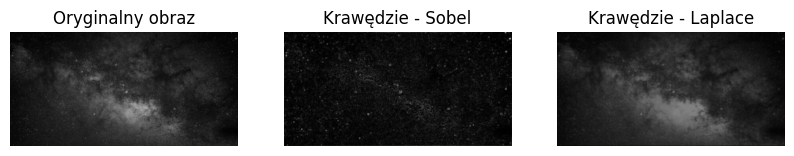

In [37]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Krawędzie - Sobel')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(edges_laplace, cmap='gray')
plt.title('Krawędzie - Laplace')
plt.axis('off')

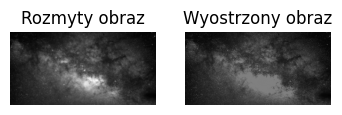

In [38]:
plt.subplot(2, 3, 4)
plt.imshow(blurred, cmap='gray')
plt.title('Rozmyty obraz')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sharpened, cmap='gray')
plt.title('Wyostrzony obraz')
plt.axis('off')

plt.show()